# Livrable  - Crunching de data

Realized by : **KHELIFI Nour El Houda**


In this notebook, I wish I have answered rightly to your questions and have clearly met your expectations. 

## Importation of necessary libraries and Data loading

In [2]:
import pandas as pd
from urllib.request import urlopen  
import os.path as osp
import os
import logging
import zipfile
from glob import glob
logging.getLogger().setLevel('INFO')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('C:/Users/Nour/Downloads/data/cities.csv')
df1 = pd.read_csv('C:/Users/Nour/Downloads/data/providers.csv')
df2 = pd.read_csv('C:/Users/Nour/Downloads/data/stations.csv')
df3 = pd.read_csv('C:/Users/Nour/Downloads/data/ticket_data.csv')

## Dataframes manipulation

### Cities DATASET 

In [4]:
index = df. index
number_of_rows = len(index)
print(number_of_rows)

8040


In [5]:
df.head()


,id,local_name,unique_name,latitude,longitude,population
0,5159,"Padua, Veneto, Italia",padua,45.406435,11.876761,209678.0
1,76,"Barcelona, Cataluña, España",barcelona,41.385064,2.173404,1611822.0
2,81,"Basel, Basel-Stadt, Schweiz",basel,47.593437,7.619812,NaN
3,259,"Erlangen, Bayern, Deutschland",erlangen,49.589674,11.011961,105412.0
4,11979,"Balș, Olt, România",balș,44.353354,24.095672,NaN


In [6]:
df.describe()

,id,latitude,longitude,population
count,8040.000000,8040.000000,8040.000000,3.690000e+02
mean,6328.786816,47.223456,6.299331,3.360184e+05
std,3504.698537,3.700934,7.747070,5.840409e+05
min,1.000000,1.370676,-101.397388,1.000460e+05
25%,2501.500000,44.662402,1.214282,1.253750e+05
50%,7003.500000,47.304750,4.887856,1.803020e+05
75%,9014.250000,49.611998,10.311597,3.098690e+05
max,12192.000000,64.145981,48.731938,8.416535e+06


In [7]:
df.shape

(8040, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           8040 non-null   int64  
 1   local_name   8040 non-null   object 
 2   unique_name  8039 non-null   object 
 3   latitude     8040 non-null   float64
 4   longitude    8040 non-null   float64
 5   population   369 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 377.0+ KB


In [9]:
df.columns

Index(['id', 'local_name', 'unique_name', 'latitude', 'longitude',
       'population'],
      dtype='object')

<AxesSubplot:ylabel='None'>

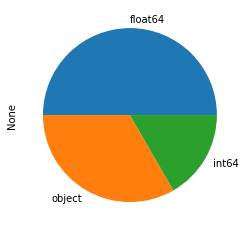

In [10]:
#statistics for column types
df.dtypes.value_counts().plot.pie()

We notice that half the Cities dataset is of type float64 and the other half is partitioned into int64 and object type

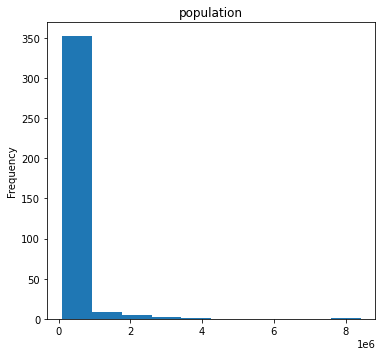

In [11]:
import matplotlib.pyplot as plt 
dimensions = ['population']

plt.figure(1, figsize=(20,12))

for i in range(1,2):
    plt.subplot(2,3,i)
    df[dimensions[i-1]].plot(kind='hist', title=dimensions[i-1])

Let's study the correlation of different features of Cities dataset :

To verify the percentage of missing values in different Cities dataset columns, here we develop a function missing_values :

In [12]:
def missing_values():
    missing_dict={}
    for c in df.columns :
        nb_missvalues_per_column = sum(df[c].isna())
        if nb_missvalues_per_column>0 :
            missing_dict[c] = nb_missvalues_per_column
            
    # Sort dictionary by value and print
    for key, value in sorted(missing_dict.items(), key=lambda x: x[1]):
        print("%s: %s" % (key, value))
missing_values()

unique_name: 1
population: 7671


* The amount of rows with missing values in "population" presents a big quantity in comparison with the dataset size, and there is no easy way to infer its data so it might be best to drop it.

In [13]:
# Drop entries with missing values in population
print('Data entries before dropping:', df.shape) 
df.drop(['population'], axis=1, inplace=True)
#cols = df.columns[df.isna().any()]
#df1 = df.drop(cols, axis = 1)
#print(df1)

print("-" * 40)
#print('Data entries after dropping:', df1.shape[0])
print('Data entries after dropping:', df.shape)

Data entries before dropping: (8040, 6)
----------------------------------------
Data entries after dropping: (8040, 5)


### Providers DATASET : 

In [14]:
index = df1. index
number_of_rows1 = len(index)
print(number_of_rows1)

227


In [15]:
df1.head(100)


,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
1,10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
2,11,3,NaN,infobus,Infobus,False,False,False,False,bus
3,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
4,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus
...,...,...,...,...,...,...,...,...,...,...
95,109,9,377,kkklExpress,KKKL Express,False,False,False,False,bus
96,110,9,379,kmkStarcoach,KMK Starcoach,False,False,False,False,bus
97,111,9,381,komtarGunungRaya,Komtar Gunung Raya,False,False,False,False,bus
98,112,9,383,konsortiumBasEkspres,Konsortium Bas Ekspres,False,False,False,False,bus


In [16]:
df1.shape

(227, 10)

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    227 non-null    int64 
 1   company_id            227 non-null    int64 
 2   provider_id           213 non-null    object
 3   name                  227 non-null    object
 4   fullname              227 non-null    object
 5   has_wifi              224 non-null    object
 6   has_plug              224 non-null    object
 7   has_adjustable_seats  224 non-null    object
 8   has_bicycle           224 non-null    object
 9   transport_type        227 non-null    object
dtypes: int64(2), object(8)
memory usage: 17.9+ KB


In [18]:
df1.columns

Index(['id', 'company_id', 'provider_id', 'name', 'fullname', 'has_wifi',
       'has_plug', 'has_adjustable_seats', 'has_bicycle', 'transport_type'],
      dtype='object')

<AxesSubplot:ylabel='None'>

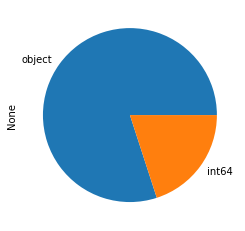

In [19]:
#statistics for column types
df1.dtypes.value_counts().plot.pie()

Like we see here in the Pie plot, the amount of the dataset is of object type and the rest is of int64 type

Text(0.5, 1.0, '4 Top Type Transport utilisé')

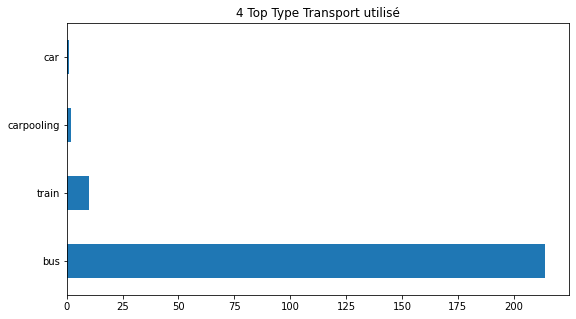

In [20]:
#plotting transport_type feature
plt.figure(figsize=(9,5))
df1['transport_type'].value_counts()[:4].plot(kind='barh')
plt.title('4 Top Type Transport utilisé')

The best mean of transport according to most of people is the bus according to the ploting

* Fortunately and as we see here, there is not missing values in our dataset and this is reassuring !!
Let's now see missing values in different Providers dataset columns, here we develop a function missing_values :

In [21]:
def missing_values():
    missing_dict={}
    for c in df1.columns :
        nb_missvalues_per_column = sum(df1[c].isna())
        if nb_missvalues_per_column>0 :
            missing_dict[c] = nb_missvalues_per_column
            
    # Sort dictionary by value and print
    for key, value in sorted(missing_dict.items(), key=lambda x: x[1]):
        print("%s: %s" % (key, value))
missing_values()

has_wifi: 3
has_plug: 3
has_adjustable_seats: 3
has_bicycle: 3
provider_id: 14


* The amount of rows with missing values in any of has_wifi, has_plug, has_adjustable_seats, has_bicycle and provider_id are few in comparison with the dataset size, and there is no easy way to infer their data so it might be best to drop them.

In [22]:
# Drop entries with missing values in WRank, LRank, Wsets, Lsets, L1, W1, L2 or W2
#print('Data entries before dropping:', df1.shape)         
#df1.dropna(subset=['has_wifi', 'has_plug', 'has_adjustable_seats', 'has_bicycle', 'provider_id'], axis=0, inplace=True)


#print("-" * 40)
#print('Data entries after dropping:', df1.shape)

### Stations DATASET : 

In [23]:
index = df2. index
number_of_rows2 = len(index)
print(number_of_rows2)

11035


In [24]:
df2.head()
#Latitude Latitude of the Bus Stop - Longitude Longitude of the Bus Stop

,id,unique_name,latitude,longitude
0,1,Aalen (Stuttgarter Straße),48.835296,10.092956
1,2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883
2,3,Aéroport CDG,49.009900,2.559310
3,4,Aéroport de Berlin-Schönefeld,52.389446,13.520345
4,5,Aéroport de Dresden,51.123604,13.764737


In [25]:
df2.shape

(11035, 4)

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11035 entries, 0 to 11034
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11035 non-null  int64  
 1   unique_name  11035 non-null  object 
 2   latitude     11035 non-null  float64
 3   longitude    11035 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 345.0+ KB


In [27]:
df2.columns

Index(['id', 'unique_name', 'latitude', 'longitude'], dtype='object')

In [28]:
df2.describe()

,id,latitude,longitude
count,11035.000000,11035.000000,11035.000000
mean,5518.026914,47.526678,7.580807
std,3185.719813,3.953972,63.655681
min,1.000000,-22.355790,-22.625538
25%,2759.500000,44.896446,1.358655
50%,5518.000000,47.759670,5.824010
75%,8276.500000,50.349956,12.166133
max,11036.000000,64.137571,6645.000000


<AxesSubplot:ylabel='None'>

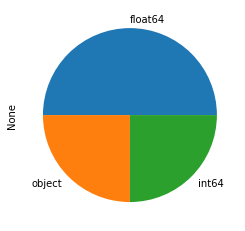

In [29]:
#statistics for column types
df2.dtypes.value_counts().plot.pie()

We notice that half the Stations dataset is of type float64 and the other half is partitioned into int64 and object type

* Fortunately and as we see here, there is not missing values in our dataset and this is reassuring !!

In [30]:
def missing_values():
    missing_dict={}
    for c in df2.columns :
        nb_missvalues_per_column = sum(df2[c].isna())
        if nb_missvalues_per_column>0 :
            missing_dict[c] = nb_missvalues_per_column
            
    # Sort dictionary by value and print
    for key, value in sorted(missing_dict.items(), key=lambda x: x[1]):
        print("%s: %s" % (key, value))
missing_values()

### Tickets DATASET 

In [31]:
index = df3. index
number_of_rows3 = len(index)
print(number_of_rows3)

74168


In [32]:
df3.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542


In [33]:
df3.describe()

,id,company,o_station,d_station,price_in_cents,o_city,d_city
count,7.416800e+04,74168.000000,32727.000000,32727.000000,74168.000000,74168.000000,74168.000000
mean,6.832108e+06,7109.565527,2907.132673,2347.858129,4382.711061,849.186105,883.776265
std,2.141060e+04,3005.380792,3347.629180,3090.798007,3739.325367,1485.791782,1654.698575
min,6.795025e+06,9.000000,3.000000,3.000000,300.000000,5.000000,1.000000
25%,6.813567e+06,8376.000000,400.000000,396.000000,1900.000000,485.000000,453.000000
50%,6.832108e+06,8385.000000,701.000000,575.000000,3350.000000,628.000000,562.000000
75%,6.850650e+06,8385.000000,6246.000000,4538.000000,5250.000000,628.000000,628.000000
max,6.869192e+06,8387.000000,11017.000000,11017.000000,38550.000000,12190.000000,12190.000000


In [34]:
df3.shape

(74168, 12)

In [35]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74168 entries, 0 to 74167
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               74168 non-null  int64  
 1   company          74168 non-null  int64  
 2   o_station        32727 non-null  float64
 3   d_station        32727 non-null  float64
 4   departure_ts     74168 non-null  object 
 5   arrival_ts       74168 non-null  object 
 6   price_in_cents   74168 non-null  int64  
 7   search_ts        74168 non-null  object 
 8   middle_stations  32727 non-null  object 
 9   other_companies  32727 non-null  object 
 10  o_city           74168 non-null  int64  
 11  d_city           74168 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 6.8+ MB


In [36]:
df3.columns

Index(['id', 'company', 'o_station', 'd_station', 'departure_ts', 'arrival_ts',
       'price_in_cents', 'search_ts', 'middle_stations', 'other_companies',
       'o_city', 'd_city'],
      dtype='object')

<AxesSubplot:ylabel='None'>

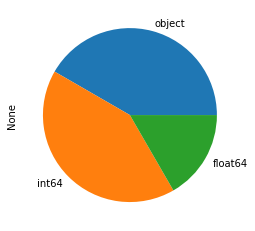

In [37]:
#statistics for column types
df3.dtypes.value_counts().plot.pie()

* We notice that half the Tickets dataset is partitioned into type object type and int64 type and the rest is of type float64 type 

Text(0.5, 1.0, '10 Top middle stations')

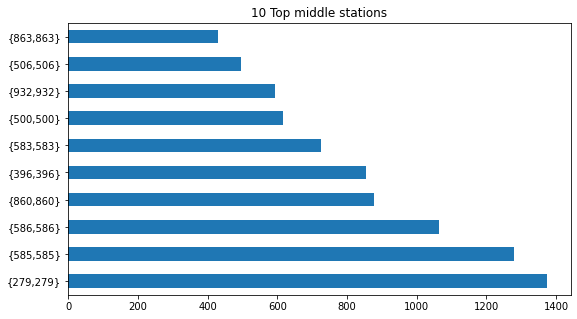

In [38]:
#plotting local_name feature
plt.figure(figsize=(9,5))
df3['middle_stations'].value_counts()[:10].plot(kind='barh')
plt.title('10 Top middle stations')

* Let's study the correlation of different features of Tickets dataset :

Text(0.5, 0, 'Count')

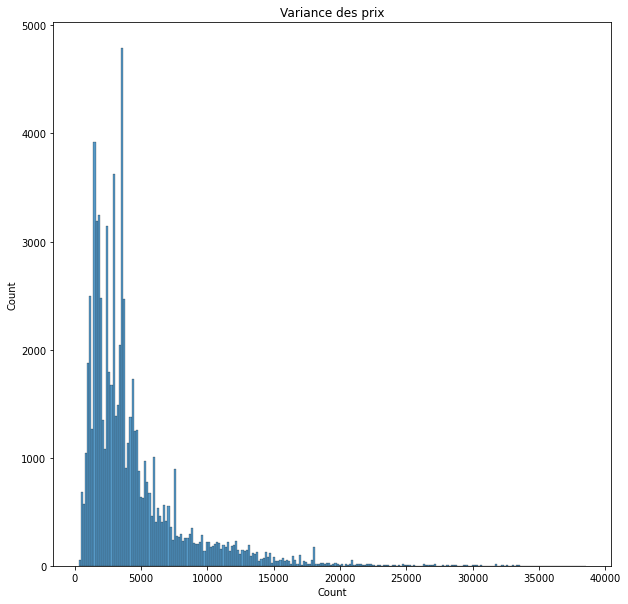

In [39]:
plt.figure(figsize=(10,10))
g=sns.histplot(x="price_in_cents", data=df3)
g.set_title("Variance des prix")
g.set_xlabel("Prices")
g.set_xlabel("Count")

In [40]:
df3.price_in_cents.describe()

count    74168.000000
mean      4382.711061
std       3739.325367
min        300.000000
25%       1900.000000
50%       3350.000000
75%       5250.000000
max      38550.000000
Name: price_in_cents, dtype: float64

* Like the plotting shows, there is not missing values in our dataset except few in o_station, d_station, middle_stations and other_companies so let's verify more with our function missing_values :


In [41]:
def missing_values():
    missing_dict={}
    for c in df3.columns :
        nb_missvalues_per_column = sum(df3[c].isna())
        if nb_missvalues_per_column>0 :
            missing_dict[c] = nb_missvalues_per_column
            
    # Sort dictionary by value and print
    for key, value in sorted(missing_dict.items(), key=lambda x: x[1]):
        print("%s: %s" % (key, value))
missing_values()


o_station: 41441
d_station: 41441
middle_stations: 41441
other_companies: 41441


* We notice here through the missing_values function and we found that o_station, d_station, middle_stations and other_companies columns have more than the half of their rows are missed.

## Extraction d'informations intéressantes 

In [42]:
# Convert the prices into euros
df3['price'] = df3['price_in_cents'] / 100
df3.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,price
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,45.5
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,14.5
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,74.0
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,135.0
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,77.1


### Merging data from different dataframes to get more informations :

In [43]:
# Merge des providers et des tickets dans le DataFrame merged
merged = pd.merge(df3, df1, how='left', left_on=['company'], right_on=['id'])
merged.head()

,id_x,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,...,id_y,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,...,8385,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},...,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",...,8377,10,2,corailintercite,Intercités,False,False,True,False,train
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",...,8377,10,2,corailintercite,Intercités,False,False,True,False,train
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},...,8381,10,6,coraillunea,Intercités de Nuit,False,False,True,False,train


In [44]:
#Convert type timedelta64 to hours, minutes, seconds
def timedelta_to_hours(row, col):                 #row : ligne du dataframe / col : colonne du dataframe
    days, seconds = row[col].days, row[col].seconds
    hours = days * 24 + seconds // 3600
    minutes = (seconds % 3600) // 60
    seconds = (seconds % 60)
    return hours, minutes, seconds


* Count Travel period 

In [45]:
merged['date_depart'] = pd.to_datetime(merged['departure_ts'])
merged['date_arriv'] = pd.to_datetime(merged['arrival_ts'])
def duree_trajet(arriv,depart):
    return (arriv - depart)

merged['duree_trajet'] = merged[['date_arriv','date_depart']].apply(lambda x: duree_trajet(*x), axis=1)
merged['duree_trajet_hours'] = merged.apply(timedelta_to_hours, args=['duree_trajet'], axis=1)

In [46]:
merged.head(100)

,id_x,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,...,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type,date_depart,date_arriv,duree_trajet,duree_trajet_hours
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,...,Blablacar,False,False,False,False,carpooling,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,0 days 06:10:00,"(6, 10, 0)"
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},...,Ouibus,True,True,True,False,bus,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,0 days 17:50:00,"(17, 50, 0)"
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",...,Intercités,False,False,True,False,train,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,1 days 07:57:00,"(31, 57, 0)"
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",...,Intercités,False,False,True,False,train,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,0 days 21:35:00,"(21, 35, 0)"
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},...,Intercités de Nuit,False,False,True,False,train,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,0 days 21:46:00,"(21, 46, 0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6795119,8385,NaN,NaN,2017-10-01 20:00:00+00,2017-10-01 22:50:00+00,1900,2017-10-01 03:40:04.769+00,NaN,NaN,...,Blablacar,False,False,False,False,carpooling,2017-10-01 20:00:00+00:00,2017-10-01 22:50:00+00:00,0 days 02:50:00,"(2, 50, 0)"
96,6795120,8385,NaN,NaN,2017-10-01 22:10:00+00,2017-10-02 00:50:00+00,1900,2017-10-01 03:40:04.769+00,NaN,NaN,...,Blablacar,False,False,False,False,carpooling,2017-10-01 22:10:00+00:00,2017-10-02 00:50:00+00:00,0 days 02:40:00,"(2, 40, 0)"
97,6795121,13,481.0,283.0,2017-10-01 06:45:00+00,2017-10-02 05:00:00+00,5490,2017-10-01 03:40:07.057+00,"{249,249}",{13},...,Flixbus,True,False,False,False,bus,2017-10-01 06:45:00+00:00,2017-10-02 05:00:00+00:00,0 days 22:15:00,"(22, 15, 0)"
98,6795122,13,481.0,283.0,2017-10-01 06:45:00+00,2017-10-01 18:45:00+00,6490,2017-10-01 03:40:07.057+00,"{249,249}",{13},...,Flixbus,True,False,False,False,bus,2017-10-01 06:45:00+00:00,2017-10-01 18:45:00+00:00,0 days 12:00:00,"(12, 0, 0)"


* Adding the details regarding the Public holidays from September 2017 to December 2017

In [47]:
def holiday_label (row):
    if row == datetime.date(2017, 9, 22) :
          return '1'
    if row == datetime.date(2017, 10, 31) :
          return '1'
    if row == datetime.date(2017, 11, 1) :
          return '2'
    if row == datetime.date(2017, 11, 11):
          return '1'
    if row  == datetime.date(2017, 12, 21):
          return '1'
    if row == datetime.date(2017, 12, 24):
          return '1'
    if row == datetime.date(2017, 12, 25) :
          return '2'
    if row == datetime.date(2017, 12, 26):
          return '2'
    if row == datetime.date(2017, 12, 31):
          return '1'
    return '0'

In [48]:
import datetime
merged.insert(12,'holiday_label',pd.to_datetime)
merged['holiday_label'] = merged['holiday_label'].apply (lambda row: holiday_label(row))

In [49]:
merged.columns

Index(['id_x', 'company', 'o_station', 'd_station', 'departure_ts',
       'arrival_ts', 'price_in_cents', 'search_ts', 'middle_stations',
       'other_companies', 'o_city', 'd_city', 'holiday_label', 'price', 'id_y',
       'company_id', 'provider_id', 'name', 'fullname', 'has_wifi', 'has_plug',
       'has_adjustable_seats', 'has_bicycle', 'transport_type', 'date_depart',
       'date_arriv', 'duree_trajet', 'duree_trajet_hours'],
      dtype='object')

* Price per provider (sum,count,maw,min) :

In [50]:
merged1=merged.groupby(['provider_id']).agg({'price': ['sum', 'count','max','min']})
merged1.columns = ["_".join(x) for x in merged1.columns.ravel()]
st_week_grp = pd.DataFrame(merged1).reset_index()
st_week_grp.shape
st_week_grp.head(100)

,provider_id,price_sum,price_count,price_max,price_min
0,1,787469.50,8654,351.00,12.30
1,141,163.95,1,163.95,163.95
2,16,118677.10,796,339.00,41.60
3,2,151534.70,2193,271.40,11.40
4,299,8111.82,252,153.64,12.88
5,4,10842.50,170,224.80,9.90
6,5,466163.00,6763,301.60,4.90
7,507,150.99,3,71.40,38.29
8,545,24.50,1,24.50,24.50
9,597,1116.00,16,103.00,50.00


* Price per fullname_company (sum,count,maw,min)

In [51]:
merged2=merged.groupby(['fullname']).agg({'price': ['sum', 'count','max','min']})
merged2.columns = ["_".join(x) for x in merged2.columns.ravel()]
st_week_grp = pd.DataFrame(merged2).reset_index()
st_week_grp.shape
st_week_grp.head(100)

,fullname,price_sum,price_count,price_max,price_min
0,Blablacar,1136383.46,41441,161.50,3.00
1,Deinbus.de,293.90,9,52.00,24.00
2,Eurolines,34420.12,725,168.90,14.00
3,Eurolines UK,150.99,3,71.40,38.29
4,Eurostar,84924.90,509,385.50,33.30
5,ExpressBus,163.95,1,163.95,163.95
6,Flixbus,279433.35,7433,229.00,8.50
7,Globtour,24.50,1,24.50,24.50
8,Intercités,151534.70,2193,271.40,11.40
9,Intercités de Nuit,1451.70,14,134.00,75.30


* Price per every type of transport means (sum,count,maw,min)

In [52]:
merged3=merged.groupby(['transport_type']).agg({'price': ['sum', 'count','max','min']})
merged3.columns = ["_".join(x) for x in merged3.columns.ravel()]
st_week_grp = pd.DataFrame(merged3).reset_index()
st_week_grp.shape
st_week_grp.head()

,transport_type,price_sum,price_count,price_max,price_min
0,bus,503964.78,13798,229.0,8.5
1,carpooling,1136383.46,41441,161.5,3.0
2,train,1610220.90,18929,385.5,4.9


In [53]:
# Merge des tickets et des cities dans le DataFrame merged
merged4 = pd.merge(df3, df, how='left', left_on=['o_city'], right_on=['id'])
merged4.rename(columns={'latitude': 'o_latitude', 'longitude': 'o_longitude'}, inplace=True)
merged4 = pd.merge(merged4, df, how='left', left_on=['d_city'], right_on=['id'])
merged4.rename(columns={'latitude': 'd_latitude', 'longitude': 'd_longitude'}, inplace=True)

In [54]:
merged4.head()

,id_x,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,...,id_y,local_name_x,unique_name_x,o_latitude,o_longitude,id,local_name_y,unique_name_y,d_latitude,d_longitude
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,...,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},...,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",...,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",...,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},...,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318


* For Calculating Distance between different cities by using Longitude and Latitude (origin and destination) , we have used the Haversine formula

In [55]:
#Calculate the great circle distance in kilometers between two points with haversine formula 
from math import radians, cos, sin, asin, sqrt

def calc_dist(lon1, lat1, lon2, lat2):
  
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371         # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

* Count trip distances between different cities :

In [56]:
merged4['distance'] = merged4[['o_longitude','o_latitude','d_longitude','d_latitude']].apply(lambda x: calc_dist(*x), axis=1)

In [57]:
merged4.head()

,id_x,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,...,local_name_x,unique_name_x,o_latitude,o_longitude,id,local_name_y,unique_name_y,d_latitude,d_longitude,distance
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,...,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,503.197167
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},...,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,503.197167
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",...,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,503.197167
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",...,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,503.197167
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},...,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,503.197167


In [58]:
# Merge des providers et des cities dans le DataFrame trip_prices
trip_prices = pd.merge(df3, df, how='left', left_on='o_city', right_on=['id'])
trip_prices.rename(columns={'unique_name': 'o_name'}, inplace=True)
trip_prices = pd.merge(trip_prices, df, how='left', left_on='d_city', right_on=['id'])
trip_prices.rename(columns={'unique_name': 'd_name'}, inplace=True)

* Count price statistics groupping by different cities (sum,count,maw,min) :

In [59]:
trip_prices = trip_prices.groupby(['o_name', 'd_name']).agg({'price': ['count', 'min', 'max', 'mean']})

trip_prices = pd.DataFrame(trip_prices).reset_index()
trip_prices.shape
trip_prices.head()


o_name              d_name price                          
                                             count    min    max        mean
0  aeroport-paris-vatry-              troyes     1   53.0   53.0   53.000000
1                   agde           amsterdam     5  186.0  220.0  203.200000
2                   agen               dijon     2   98.6  136.5  117.550000
3                   agen           marseille    30   20.0   89.2   40.426667
4                   agen  marseille-aeroport     6   37.0   40.5   38.333333

* Price statistics groupping by Travel distance :

In [60]:
# classification 0-200km, 201-800km, 800-2000km and 2000+km
merged4.loc[merged4.distance <= 200, 'dist_class'] = '[0, 200]'
merged4.loc[(merged4.distance > 200) & (merged4.distance <= 800), 'dist_class'] = '[201, 800]'
merged4.loc[(merged4.distance > 800) & (merged4.distance <= 2000), 'dist_class'] = '[801, 2000]'
merged4.loc[merged4.distance > 2000, 'dist_class'] = '[2001 +)'
#On peux maintenant commencer par afficher les statistiques obtenues selon ces classes de distance:

stat_df = merged4.groupby(['dist_class']).agg({'price' : ['min', 'max', 'mean']})
stat_df


price                  
              min    max       mean
dist_class                         
[0, 200]      3.0  251.0  16.789723
[201, 800]    8.5  385.5  48.938366
[801, 2000]  19.4  375.5  88.578692

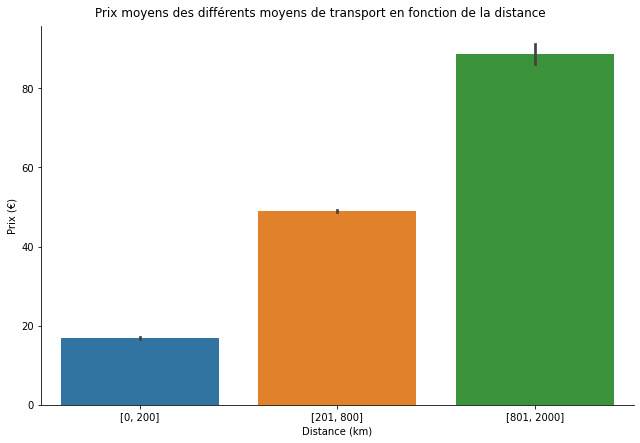

In [70]:
# Visualisation sur les différences de prix : traçage d'un histogramme des prix moyens, en fonction de la distance de trajet :

order = ['[0, 200]', '[201, 800]', '[801, 2000]']
g = sns.catplot(x="dist_class", y="price", kind="bar", data=merged4, height=6, aspect=1.5, order=order)
g.fig.suptitle('Prix moyens des moyens de transport en fonction de la distance', x=0.5, y=1.02)
plt.xlabel('Distance (km)')
plt.ylabel('Prix (€)');

In [78]:
df = pd.merge(df1.transport_type, merged4, left_index=True, right_index=True)
df.head()

,transport_type,id_x,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,...,unique_name_x,o_latitude,o_longitude,id,local_name_y,unique_name_y,d_latitude,d_longitude,distance,dist_class
0,bus,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,...,orleans,47.907018,1.90627,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,503.197167,"[201, 800]"
1,bus,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",...,orleans,47.907018,1.90627,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,503.197167,"[201, 800]"
2,bus,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}",...,orleans,47.907018,1.90627,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,503.197167,"[201, 800]"
3,bus,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}",...,orleans,47.907018,1.90627,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,503.197167,"[201, 800]"
4,bus,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",...,orleans,47.907018,1.90627,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,503.197167,"[201, 800]"


In [79]:
df.loc[df.distance <= 200, 'dist_class'] = '[0, 200]'
df.loc[(df.distance > 200) & (df.distance <= 800), 'dist_class'] = '[201, 800]'
df.loc[(df.distance > 800) & (df.distance <= 2000), 'dist_class'] = '[801, 2000]'
df.loc[df.distance > 2000, 'dist_class'] = '[2001 +)'
#On peux maintenant commencer par afficher les statistiques obtenues selon ces classes de distance, en fonction des moyens de transport :

stat_df1 = df.groupby(['dist_class','transport_type']).agg({'price' : ['min', 'max', 'mean']})
stat_df1

price                  
                            min    max       mean
dist_class transport_type                        
[0, 200]   bus              6.0   34.9  15.013333
[201, 800] bus             11.0  135.0  24.426630
           car             18.0   18.0  18.000000
           carpooling      26.5   26.5  26.500000
           train           21.5   26.5  23.900000

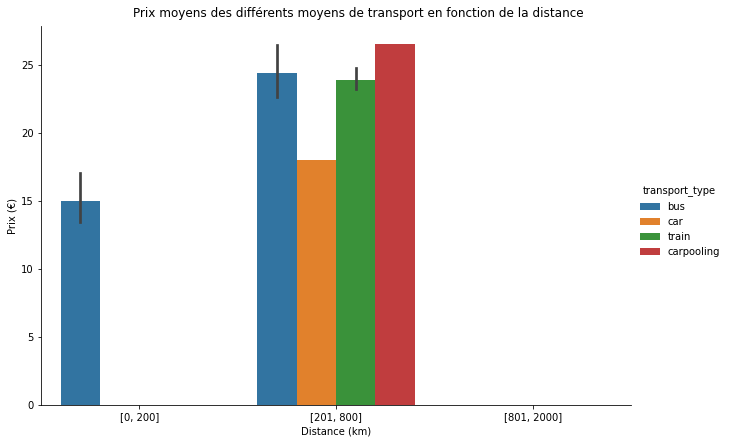

In [84]:
# Visualisation sur les différences de prix :traçage d'un histogramme des prix moyens, en fonction de la distance de trajet et du type de transport :

order = ['[0, 200]', '[201, 800]', '[801, 2000]']
g = sns.catplot(x="dist_class", y="price", hue="transport_type", kind="bar", data=df, height=6, aspect=1.5, order=order)
g.fig.suptitle('Prix moyens des moyens de transport en fonction de la distance', x=0.5, y=1.02)
plt.xlabel('Distance (km)')
plt.ylabel('Prix (€)');

# Prediction model :

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 0 to 226
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   transport_type   227 non-null    object 
 1   id_x             227 non-null    int64  
 2   company          227 non-null    int64  
 3   o_station        52 non-null     float64
 4   d_station        52 non-null     float64
 5   departure_ts     227 non-null    object 
 6   arrival_ts       227 non-null    object 
 7   price_in_cents   227 non-null    int64  
 8   search_ts        227 non-null    object 
 9   middle_stations  52 non-null     object 
 10  other_companies  52 non-null     object 
 11  o_city           227 non-null    int64  
 12  d_city           227 non-null    int64  
 13  price            227 non-null    float64
 14  id_y             227 non-null    int64  
 15  local_name_x     227 non-null    object 
 16  unique_name_x    227 non-null    object 
 17  o_latitude      

In [94]:
# Calcul du nombre de middle stations
def n_middle_stations(row):
    m_st = str(row.middle_stations)
    if m_st == 'nan':
        return 0
    else:
        return len(m_st.split(','))
    
df['n_middle_stations'] = df.apply(n_middle_stations, axis=1)

In [95]:
# Nombre des compagnies proposant un trajet similaire
def n_other_companies(row):
    other_comp = str(row.other_companies)
    if other_comp == 'nan':
        return 0
    else:
        return len(other_comp.split(','))
    
df['n_other_companies'] = df.apply(n_other_companies, axis=1)

In [125]:
def timedelta_hours_(row, col):
    days = row[col].days
    seconds = row[col].seconds
    hours = days * 24 + seconds / 3600
    return hours

In [126]:
df['departure'] = pd.to_datetime(df['departure_ts'])
df['search'] = pd.to_datetime(df['search_ts'])
def duree_pre_trajet(depart,search):
    return (depart - search)

df['duree_pre_trajet'] = df[['departure','search']].apply(lambda x: duree_pre_trajet(*x), axis=1)
df['duree_pre_trajet_hours'] = df.apply(timedelta_hours_, args=['duree_pre_trajet'], axis=1)

In [128]:
#identification des features et des labels
features = ['distance', 'duree_pre_trajet_hours', 'transport_type', 'n_middle_stations','company', 'n_other_companies']
X = df[features]
y = df.price.values

In [129]:
X

,distance,duree_pre_trajet_hours,transport_type,n_middle_stations,company,n_other_companies
0,503.197167,301.774444,bus,0,8385,0
1,503.197167,300.856667,bus,2,9,1
2,503.197167,301.221944,bus,4,8377,2
3,503.197167,301.221944,bus,4,8377,2
4,503.197167,309.538611,bus,2,8381,1
...,...,...,...,...,...,...
222,308.159424,-391.329167,train,0,8385,0
223,308.159424,-384.329167,carpooling,0,8385,0
224,308.159424,-384.329167,bus,0,8385,0
225,308.159424,-383.662222,bus,0,8385,0


**Inspect Categorial Features**
* Start by inspecting the categorical features to look for any anomalies.

In [130]:
# Describe the categorical features (object type)
X.describe()

,distance,duree_pre_trajet_hours,n_middle_stations,company,n_other_companies
count,227.000000,227.000000,227.000000,227.000000,227.000000
mean,230.985118,61.693419,0.475771,7314.370044,0.237885
std,57.355960,100.528166,0.893974,2801.096836,0.446987
min,18.913242,-391.329167,0.000000,9.000000,0.000000
25%,205.842591,11.110694,0.000000,8385.000000,0.000000
50%,232.966968,25.324167,0.000000,8385.000000,0.000000
75%,261.121575,132.911528,0.000000,8385.000000,0.000000
max,503.197167,309.538611,4.000000,8385.000000,2.000000


#### One hot encoder 

In [131]:
# Encode categorical features as a one-hot numeric array
from sklearn.preprocessing import OneHotEncoder

categorical_X = ['company', 'transport_type']
numerical_X = ['distance', 'duree_pre_trajet_hours', 'n_middle_stations']

enc = OneHotEncoder()
enc.fit(X[categorical_X])
onehotlabels = enc.transform(X[categorical_X]).toarray()

#Stack arrays(onehotlabels and numerical features) in sequence horizontally (column wise)
X = np.hstack((onehotlabels, X[numerical_X].values)) 
X.shape

(227, 15)

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

**Random Forest Regressor Model :**

In [138]:
from sklearn.ensemble import RandomForestRegressor

# Instantiation
rf_clf = RandomForestRegressor(n_estimators=1000, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, 
n_jobs=-1, random_state=None, verbose=1, warm_start=False, ccp_alpha=0.0, max_samples=None)

# Fitting the model
rf_clf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    0.6s finished


RandomForestRegressor(n_estimators=1000, n_jobs=-1, verbose=1)

In [139]:
# Predict the model
pred = rf_clf.predict(X_test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    0.0s finished


In [140]:
print('Prediction: %d' % pred[0])

Prediction: 17


In [146]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae = mean_absolute_error(y_test, pred)
print('MAE: : % f' %(mae))
rmse = mean_squared_error(y_test, pred)
print('RMSE : % f' %(rmse)) 

MAE: :  3.654239
RMSE :  64.811308


* We notice here that MAE is around 4€ and RMSE around 65€ (poor ability of the model to accurately predict the data).


**Xgboost Model :**

In [152]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE, r2_score

# Instantiation
xgb_r = xg.XGBRegressor(n_estimators = 10, seed = 123)
  
# Fitting the model
xgb_r.fit(X_train, y_train)
  
# Predict the model
pred = xgb_r.predict(X_test)
  
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

r2_score = r2_score(y_test, pred)
print("R² : % f" %(r2_score))

RMSE :  7.909831
R² :  0.538204


* Let's try to improve the results by using GridSearchCV and determine the best hyper-parameters.

In [153]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [159]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [161]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_


best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 389 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:   51.3s


Model Performance
Average Error: 4.1588 degrees.
Accuracy = 82.71%.


[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


* Accuracy = 82.71%, we have so a perfect model which can affort good price predictions to our passengers 